In [1]:
import pandas as pd 
import os 
import glob as gb 
from tensorflow import keras 

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Dense
from keras.layers import Flatten

# Assigning Path for the dataset

In [2]:
TRAIN_DIR = "/Learn/Deep Learning/My Projects/Emotion Classification/Emotion Detection/Smaller/train_smaller"
TEST_DIR = "/Learn/Deep Learning/My Projects/Emotion Classification/Emotion Detection/Smaller/test_smaller"
        

    
    
BATCH_SIZE=64

In [3]:
for folder in os.listdir(TRAIN_DIR):
    print(folder)

Anger_smaller
Disgust_smaller
Fear_smaller
Happiness_smaller
Sadness_smaller
Surprise_smaller


In [4]:
for folder in os.listdir(TRAIN_DIR):
    files = gb.glob(pathname= str(TRAIN_DIR + "/" + folder + '/*.jpeg'))
    print(f'For training data , found {len(files)} in folder {folder} ' )

For training data , found 18 in folder Anger_smaller 
For training data , found 18 in folder Disgust_smaller 
For training data , found 19 in folder Fear_smaller 
For training data , found 19 in folder Happiness_smaller 
For training data , found 19 in folder Sadness_smaller 
For training data , found 19 in folder Surprise_smaller 


In [5]:
for folder in os.listdir(TEST_DIR):
    files = gb.glob(pathname= str(TEST_DIR + "/" + folder + '/*.jpeg'))
    print(f'For testing data , found {len(files)} in folder {folder} ' )

For testing data , found 2 in folder Anger_smaller 
For testing data , found 2 in folder Disgust_smaller 
For testing data , found 2 in folder Fear_smaller 
For testing data , found 2 in folder Happiness_smaller 
For testing data , found 2 in folder Sadness_smaller 
For testing data , found 2 in folder Surprise_smaller 


In [6]:
import random 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

def view_random_image(target_dir , target_class):
    
    #We will view image from here 
    target_folder = target_dir + target_class
    
    #Get a random image path
    random_image = random.sample(os.listdir(target_folder) , 1)
    
    #Read it in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + '/' + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape {img.shape}")
    
    return img
    

# Classes present in the data 

In [7]:
class_names = ['Anger', 'Disgust' , 'Fear', 'Happiness', 'Sadness', 'Surprise']

Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)


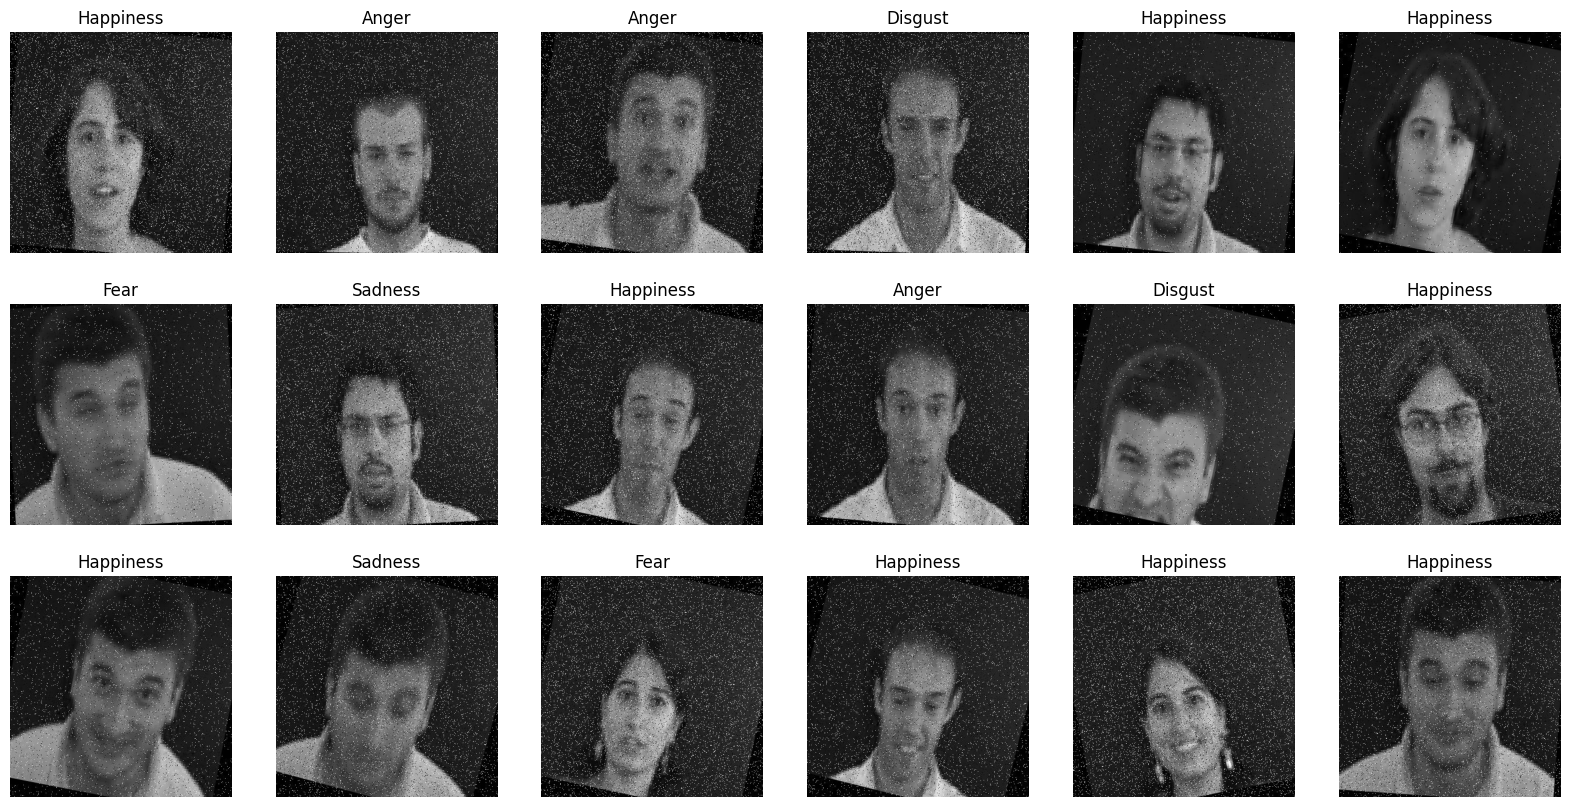

In [8]:
plt.figure(figsize=(20,10))
for i in range(18):
    plt.subplot(3,6, i+1)
    class_name = random.choice(class_names)
    img = view_random_image(target_dir= "/Learn/Deep Learning/My Projects/Emotion Classification/Emotion Detection/train/" , target_class = class_name)
    
    

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(TRAIN_DIR, 
                                                target_size=(128,128),
                                                batch_size= BATCH_SIZE,
                                                class_mode= 'categorical')


testing_set = train_datagen.flow_from_directory(TEST_DIR, 
                                                target_size=(128,128),
                                                batch_size= BATCH_SIZE,
                                                class_mode= 'categorical')


Found 112 images belonging to 6 classes.
Found 12 images belonging to 6 classes.


In [10]:
#Initializing the CNN
classifier = Sequential()

#Step 1 - Convolution
classifier.add(Conv2D(16 , (3,3) , input_shape = (128, 128, 3 ) , activation= 'relu'))

#Step 2 - Pooling
classifier.add(MaxPool2D(pool_size=(2,2)))

#Adding a second convolution layer
classifier.add(Conv2D(32 , (3,3) , activation= 'relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

#Step 3 Flattening 
classifier.add(Flatten())

#Step 4 Full Connection
classifier.add(Dense(units = 128, activation= 'relu'))

classifier.add(Dense(units= 6 , activation= 'softmax'))

#Compiling the CNN
classifier.compile(optimizer='adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [11]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 128)               3

In [12]:
history = classifier.fit(training_set,
                        epochs=50,
                        validation_data= testing_set)

Epoch 1/50
2/2 [==============================] - 2s 802ms/step - loss: 2.8527 - accuracy: 0.1250 - val_loss: 2.4155 - val_accuracy: 0.1667
Epoch 2/50
2/2 [==============================] - 1s 512ms/step - loss: 2.3685 - accuracy: 0.1429 - val_loss: 2.0865 - val_accuracy: 0.1667
Epoch 3/50
2/2 [==============================] - 1s 509ms/step - loss: 2.1943 - accuracy: 0.1607 - val_loss: 1.9706 - val_accuracy: 0.2500
Epoch 4/50
2/2 [==============================] - 1s 554ms/step - loss: 1.8938 - accuracy: 0.2054 - val_loss: 1.8201 - val_accuracy: 0.1667
Epoch 5/50
2/2 [==============================] - 1s 497ms/step - loss: 1.8062 - accuracy: 0.1607 - val_loss: 1.8221 - val_accuracy: 0.0833
Epoch 6/50
2/2 [==============================] - 1s 529ms/step - loss: 1.7883 - accuracy: 0.2500 - val_loss: 1.8235 - val_accuracy: 0.1667
Epoch 7/50
2/2 [==============================] - 1s 405ms/step - loss: 1.7853 - accuracy: 0.2321 - val_loss: 1.8002 - val_accuracy: 0.1667
Epoch 8/50
2/2 [====

In [13]:
classifier.save('/Learn/Deep Learning/My Projects/Emotion Classification/Emotion Detection/Smaller/Smaller_Model.h5')

In [14]:
classifier.evaluate(testing_set)

1/1 [==============================] - 0s 84ms/step - loss: 1.7939 - accuracy: 0.5000


[1.7939084768295288, 0.5]

In [15]:
pd.DataFrame(history.history)[['loss' , 'val_loss']]

,loss,val_loss
0,2.852736,2.415512
1,2.368521,2.086546
2,2.194258,1.970573
3,1.893759,1.820101
4,1.806191,1.822072
5,1.788315,1.823528
6,1.785335,1.800249
7,1.783925,1.810094
8,1.783320,1.807569
9,1.783031,1.798341


Text(0, 0.5, 'Loss')

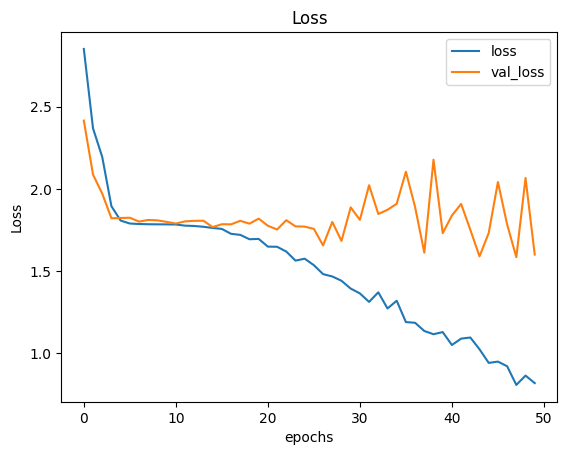

In [16]:
pd.DataFrame(history.history)[['loss' , 'val_loss']].plot()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

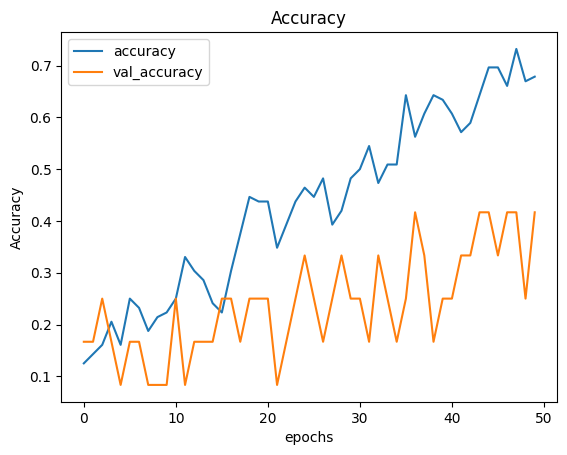

In [17]:
pd.DataFrame(history.history)[['accuracy' , 'val_accuracy']].plot()
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')

In [18]:
model_path = "/Learn/Deep Learning/My Projects/Emotion Classification/Emotion Detection/Smaller/Smaller_Model.h5"
loaded_model = keras.models.load_model(model_path)

import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

try:
    # Load the image
    image = Image.open("/Learn/Deep Learning/My Projects/Emotion Classification/Emotion Detection/Smaller/test_smaller/Happiness_smaller/abc.jpeg")

    # Resize the image to the input size expected by the model
    input_size = (128, 128)
    image_fromarray = image.resize(input_size)

    # Convert the resized image to a NumPy array and add an extra dimension
    input_data = np.expand_dims(np.array(image_fromarray), axis=0)

    # Perform any necessary preprocessing, such as normalization
    input_data = input_data / 255.0  # Assuming normalization by dividing by 255

    # Make the prediction
    pred = loaded_model.predict(input_data)
    result = np.argmax(pred[0])  # Get the index of the predicted class

    print("Predicted class index:", result)

except Exception as e:
    print("Error:", e)


1/1 [==============================] - 0s 98ms/step
Predicted class index: 3


In [19]:
training_set.class_indices

{'Anger_smaller': 0,
 'Disgust_smaller': 1,
 'Fear_smaller': 2,
 'Happiness_smaller': 3,
 'Sadness_smaller': 4,
 'Surprise_smaller': 5}